<a href="https://colab.research.google.com/github/IsraelAbebe/Personal-Projects-and-Exercises/blob/master/Tutorials/Google_Stock_Price_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

1.[Google Stock Data](https://finance.yahoo.com/quote/GOOG/history/?guccounter=1)
2. [Tutorial Video](https://www.youtube.com/watch?v=arydWPLDnEc)

**Streps**
1. Data Preprocessing
2. Build RNN
3. Making Prediction and Visualization

In [0]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [49]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [50]:
ls 'gdrive/My Drive/dataset/'


CACO/         GOOG.csv  sample_submission.csv  submission.csv  train.csv
drugLib_raw/  model.h5  sentiment/             test.csv


In [0]:
data = pd.read_csv('gdrive/My Drive/dataset/GOOG.csv',date_parser=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 7 columns):
Date         3867 non-null object
Open         3867 non-null float64
High         3867 non-null float64
Low          3867 non-null float64
Close        3867 non-null float64
Adj Close    3867 non-null float64
Volume       3867 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 211.6+ KB


In [57]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


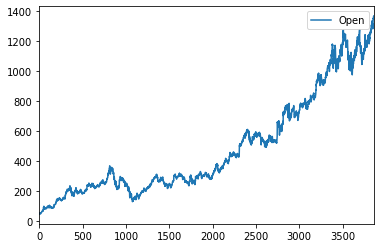

In [58]:
data[["Date","Open"]].plot.line()

In [0]:
data_train = data[data['Date'] < '2019-01-01'].copy()
data_test = data[data['Date'] >= '2019-01-01'].copy()


In [65]:
train_data = data_train.drop(['Date','Adj Close'],axis=1)
train_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [68]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(train_data)
training_data

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [0]:
X_train = []
y_train = []

In [0]:
for i in range(60,training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [0]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [73]:
X_train.shape,y_train.shape

((3557, 60, 5), (3557,))

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

In [0]:
regresser = Sequential()
regresser.add(LSTM(units=32,activation='relu',return_sequences='True',input_shape=(X_train.shape[1],5)))
regresser.add(Dropout(0.2))

regresser.add(LSTM(units=64,activation='relu',return_sequences='True'))
regresser.add(Dropout(0.3))

regresser.add(LSTM(units=128,activation='relu',return_sequences='True'))
regresser.add(Dropout(0.4))

regresser.add(LSTM(units=256,activation='relu'))
regresser.add(Dropout(0.5))

regresser.add(Dense(1))

In [99]:
regresser.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 32)            4864      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 64)            24832     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 128)           98816     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)              

In [100]:
regresser.compile(optimizer='adam',loss='mean_squared_error')
regresser.fit(X_train,y_train,epochs=10,batch_size=64)

Train on 3557 samples
Epoch 1/10
3557/3557 [==============================] - 33s 9ms/sample - loss: 0.0218
Epoch 2/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0034
Epoch 3/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0032
Epoch 4/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0028
Epoch 5/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0027
Epoch 6/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0026
Epoch 7/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0022
Epoch 8/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0022
Epoch 9/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0022
Epoch 10/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0023


In [0]:
past_60_days = data_train.tail(60)


In [102]:
df = past_60_days.append(data_test,ignore_index=True)
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [103]:
inputs=scaler.fit_transform(df)
inputs

array([[0.56857096, 0.53662928, 0.48480248, 0.49868797, 0.31777455],
       [0.49711131, 0.4702042 , 0.45747068, 0.47052856, 0.14281082],
       [0.45245855, 0.45498814, 0.4110571 , 0.44875949, 0.27048383],
       ...,
       [0.96186936, 0.95922097, 0.97414781, 0.95425385, 0.        ],
       [0.95588668, 0.98983851, 0.97856527, 0.99799969, 0.05461217],
       [0.99907566, 0.9986998 , 0.9912171 , 0.9758929 , 0.11791108]])

In [0]:
X_test = []
y_test = []

for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [105]:
X_test,y_test =  np.array(X_test),np.array(y_test)
X_test.shape,y_test.shape

((250, 60, 5), (250,))

In [0]:
y_pred = regresser.predict(X_test)

In [107]:
scaler.scale_

array([2.56772403e-03, 2.76655768e-03, 2.61396865e-03, 2.59773947e-03,
       1.70663026e-07])

In [108]:
scale = 1/2.56772403e-03
scale

389.4499519093569

In [0]:
y_pred = y_pred*scale
y_test = y_test*scale

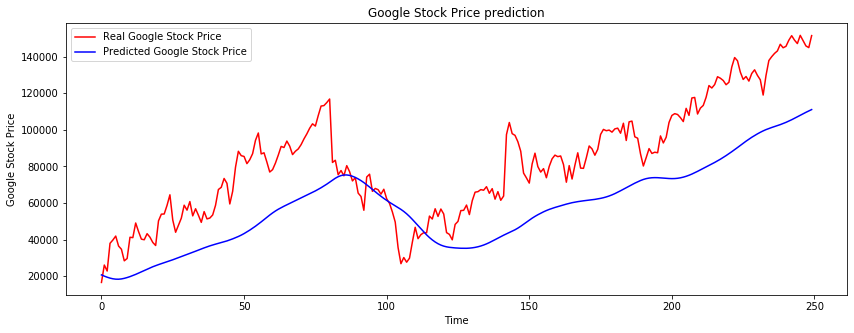

In [110]:
plt.figure(figsize=(14,5))
plt.plot(y_test*scale,color='red',label='Real Google Stock Price')
plt.plot(y_pred*scale,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()